# Processo Seletivo Zax

## Problema

Existem 5 motoboys, cada motoboy ganha uma comissão diferente por pedido coletado, e alguns motoboys possuem exclusividade com algumas lojas na qual fazem coletas.

Os motoboys não podem reclamar que ficaram sem pedidos.

Os motoboys que possuem exclusividade com as lojas, possuem prioridade.

Os motoboys podem ter exclusividade com as lojas, mas as lojas não possuem exclusividade com os motoboys.

Hoje existem 10 pedidos para serem retirados em 3 lojas.

---

## Retorno
* Quem é o motoboy e quantos pedidos terá?

* De qual loja é?

* Quanto vai ganhar?

## Dados de Entrada

Dados de entrada são do tipo dicionario, pois a manipulação dele é mais simples e bem parecida com um JSON.

In [ ]:
data = {
    "motoboy": {
        "1": {
            "commission": 2,
            "store": "all",
        },
        "2": {
            "commission": 2,
            "store": "all",
        },
        "3": {
            "commission": 2,
            "store": "all",
        },
        "4": {
            "commission": 2,
            "store": "1",
        },
        "5": {
            "commission": 3,
            "store": "all",
        }
    },
    "store": {
        "1": {
            "orders": {
                1: {
                    "value": 50,
                    "commission": 0.05,
                },
                2: {
                    "value": 50,
                    "commission": 0.05,
                },
                3: {
                    "value": 50,
                    "commission": 0.05,
                }
            }
        },
        "2": {
            "orders": {
                1: {
                    "value": 50,
                    "commission": 0.05,
                },
                2: {
                    "value": 50,
                    "commission": 0.05,
                },
                3: {
                    "value": 50,
                    "commission": 0.05,
                },
                4: {
                    "value": 50,
                    "commission": 0.05,
                }
            }
        },
        "3": {
            "orders": {
                1: {
                    "value": 50,
                    "commission": 0.15,
                },
                2: {
                    "value": 50,
                    "commission": 0.15,
                },
                3: {
                    "value": 100,
                    "commission": 0.15,
                }
            }
        }
    }
}


# Classe dos Motoboys (Motoboy.py)

Temos algumas variaveis.


*   _id -> ID do Motoboy
*   _commision -> Um valor fixo de comissão dele por pedido
*   _orders -> Os pedidos que atendeu
*   _salary -> O quanto ele vai ganhar no final apos atender todos os pedidos.

---
## Calculo do salario

O calculo é realizado pela função `calculeteSalary`.

Ele recebe de 1 pedidos = taxa fixa + (valor do pedido * porcentagem de comissão da loja)




In [ ]:
import initData


class Motoboy:

    def __init__(self, id):
        self._id = id
        self._commission = initData.data['motoboy'][id]['commission']
        self._store = initData.data['motoboy'][id]['store']
        self._orders = []
        self._salary = 0

    def calculateSalary(self, order):
        self._salary += self._commission + (order['value'] * order['commission'])

    def getId(self):
        return self._id

    def getInformation(self):
        print('Motoboy ID: {}'.format(self._id))
        print('Store: {}'.format(self._store))
        print('Commission: {}'.format(self._commission))
        print('Orders: {}'.format(self._orders))
        print('Salary: {}\n'.format(self._salary))

    def getCommission(self):
        return self._commission

    def getStore(self):
        return self._store

    def getOrders(self):
        return self._orders

    def setOrders(self, store, orders):
        order = {
            'store': store,
            'value': orders['value'],
            'commission': orders['commission']
        }
        self._orders.append(order)
        self.calculateSalary(order)

# Classe dos Lojas (Stores.py)

Temos algumas variaveis.


*   _id -> ID da Lojas
*   _orders -> Os pedidos que as lojas tem

In [ ]:
import initData


class Stores:
    def __init__(self, id):
        self._id = id
        self._orders = initData.data["store"][id]["orders"]

    def getId(self):
        return self._id

    def getOrders(self):
        return self._orders

    def removeOrders(self, order):
        self._orders.pop(order)

# Arquivo Principal (main.py)


Temos um input onde pode ser passado o ID dos Motoboys.

Caso não passe nada, ele vai mostrar todos os motoboys, se passar um ID que exista vai mostrar somente ele e caso passar algum ID que não exista vai retornar um erro.

In [ ]:
if __name__ == "__main__":
    motoboy = input("Digite o id do motoboy para pesquisa: ")
    main(motoboy)

## Função main

Tem uma entrada do input, ele busca todos os motoboys e envia para a função `orders`

In [ ]:
def main(motoboy):
    motoboy1 = Motoboy("1")
    motoboy2 = Motoboy("2")
    motoboy3 = Motoboy("3")
    motoboy4 = Motoboy("4")
    motoboy5 = Motoboy("5")

    orders(motoboy1, motoboy2, motoboy3, motoboy4, motoboy5)

    if motoboy is "":
        
        motoboy1.getInformation()
        motoboy2.getInformation()
        motoboy3.getInformation()
        motoboy4.getInformation()
        motoboy5.getInformation()

    else:
        if motoboy1.getId() == motoboy:
            motoboy1.getInformation()
        elif motoboy2.getId() == motoboy:
            motoboy2.getInformation()
        elif motoboy3.getId() == motoboy:
            motoboy3.getInformation()
        elif motoboy4.getId() == motoboy:
            motoboy4.getInformation()
        elif motoboy5.getId() == motoboy:
            motoboy5.getInformation()
        else:
            print("Motoboy not found")

## Função orders

Esta função vai rodar ate todos os pedidos estarem esgotados.

Ele escolhe os pedidos e os motoboys de forma aleatoria.

Caso o motoboy tenha exclusividade com alguma loja, ele é selecionado e somente pega pedidos daquela loja. E se não tiver, ele pega pode pegar qualquer outro pedido.

In [ ]:
def orders(motoboy1, motoboy2=None, motoboy3=None, motoboy4=None, motoboy5=None):

    store1 = Stores("1")
    store2 = Stores("2")
    store3 = Stores("3")

    motoboys = [motoboy1, motoboy2, motoboy3, motoboy4, motoboy5]
    stores = [store1, store2, store3]

    while True:
        randomOrders = random.randrange(1, 5)
        store = random.choice(stores)
        motoboy = random.choice(motoboys)
        orders = store.getOrders()

        if randomOrders in orders:
            for a in motoboys:
                if motoboy is not None:
                    if str(motoboy.getStore()) == store.getId() and randomOrders in orders:
                        setOrders(motoboy, store, store.getId(), orders, randomOrders)
                    elif motoboy.getStore() == "all" and randomOrders in orders:
                        setOrders(motoboy, store, store.getId(), orders, randomOrders)

        if len(store1.getOrders()) == 0 and len(store2.getOrders()) == 0 and len(store3.getOrders()) == 0:
            break

# Função setOrders

Ele seta o pedido para o motoboy e remove o pedido da loja, pois ele ja pertence a um motoboy

In [ ]:
def setOrders(motoboy, store, idStore, orders, randomOrders):
    motoboy.setOrders(idStore, orders[randomOrders])
    store.removeOrders(randomOrders)

# Retorno

Os retorno possiveis são estes: 

* Caso não passe ID de algum motoboy:
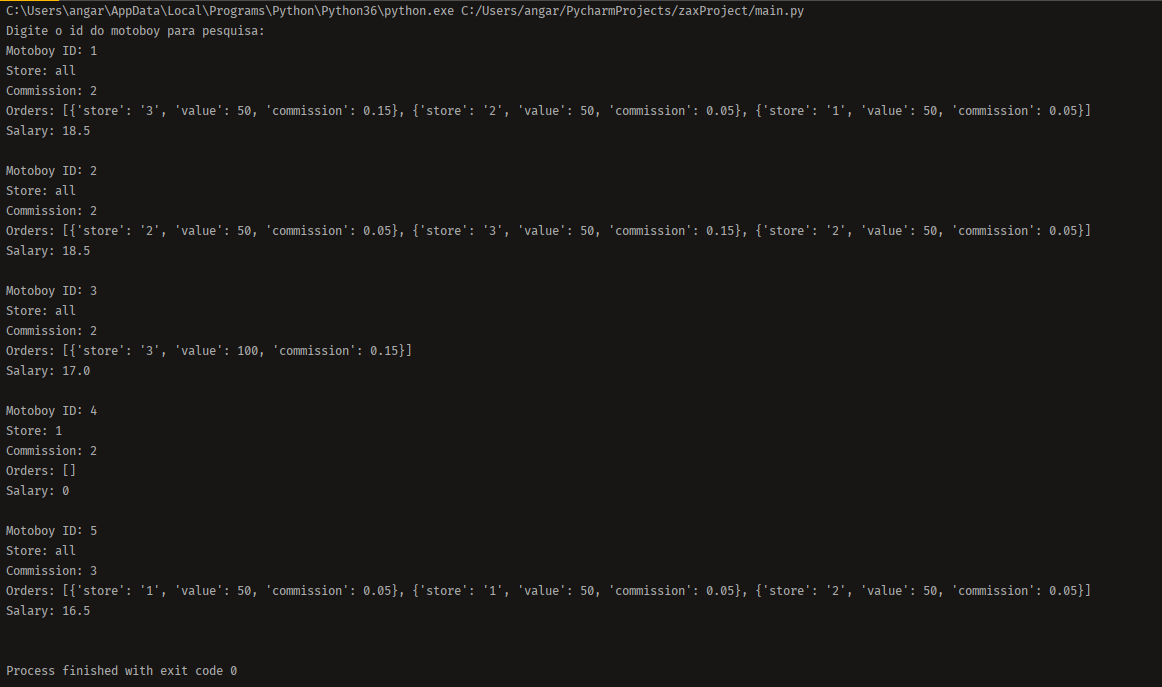

* Caso passe 1 ID de motoboy que existe:
  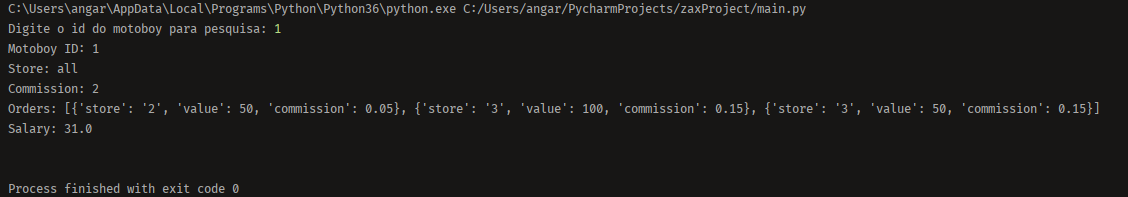

* Caso passe 1 ID de motoboy que não existe:
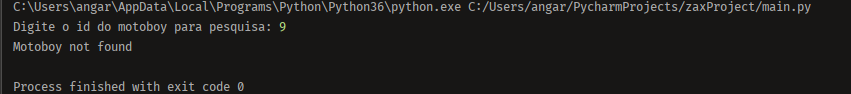